<a href="https://colab.research.google.com/github/jcs-lambda/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

# my work

## Look at the data. Choose a feature, and plot its relationship with the target.


In [4]:
df

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49347,1.0,2,2016-06-02 05:41:05,"30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...",E 30 St,40.7426,-73.9790,3200,230 E 30 St,medium,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
49348,1.0,1,2016-04-04 18:22:34,"HIGH END condo finishes, swimming pool, and ki...",Rector Pl,40.7102,-74.0163,3950,225 Rector Place,low,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
49349,1.0,1,2016-04-16 02:13:40,Large Renovated One Bedroom Apartment with Sta...,West 45th Street,40.7601,-73.9900,2595,341 West 45th Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49350,1.0,0,2016-04-08 02:13:33,Stylishly sleek studio apartment with unsurpas...,Wall Street,40.7066,-74.0101,3350,37 Wall Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

In [6]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.00000,48818.000000,48818.000000
mean,1.201790,1.537158,40.750756,-73.972758,3579.560982,0.524827,0.478266,0.478266,0.447622,0.424843,0.415072,0.367078,0.052767,0.268446,0.185649,0.175898,0.132758,0.138392,0.102831,0.087201,0.060469,0.055205,0.051907,0.046192,0.043304,0.042710,0.03933,0.027224,0.026240
std,0.470707,1.106078,0.038962,0.028887,1762.420875,0.499388,0.499533,0.499533,0.497254,0.494324,0.492740,0.482013,0.223571,0.443156,0.388827,0.380737,0.339317,0.345314,0.303741,0.282133,0.238357,0.228382,0.221842,0.209903,0.203542,0.202204,0.19438,0.162736,0.159851
min,0.000000,0.000000,40.571200,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.describe(exclude='number')

,created,description,display_address,street_address,interest_level
count,48818,47393,48685,48808,48818
unique,48149,37854,8675,15136,3
top,2016-06-12 13:20:45,,Broadway,3333 Broadway,low
freq,3,1627,435,174,33947


In [8]:
df.isnull().sum()

bathrooms                  0
bedrooms                   0
created                    0
description             1425
display_address          133
latitude                   0
longitude                  0
price                      0
street_address            10
interest_level             0
elevator                   0
cats_allowed               0
hardwood_floors            0
dogs_allowed               0
doorman                    0
dishwasher                 0
no_fee                     0
laundry_in_building        0
fitness_center             0
pre-war                    0
laundry_in_unit            0
roof_deck                  0
outdoor_space              0
dining_room                0
high_speed_internet        0
balcony                    0
swimming_pool              0
new_construction           0
terrace                    0
exclusive                  0
loft                       0
garden_patio               0
wheelchair_access          0
common_outdoor_space       0
dtype: int64

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


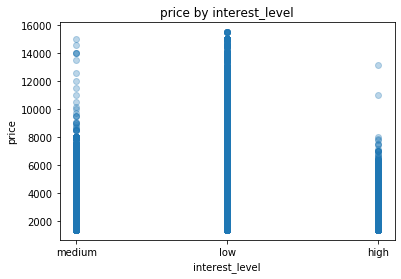

In [14]:
target = 'price'
feature = 'interest_level'

plt.scatter(df[feature], df[target], alpha=0.3)
plt.ylabel(target)
plt.xlabel(feature)
plt.title(f'{target} by {feature}')
plt.show()

looks like 'interest_level' will not be a good predictor of price

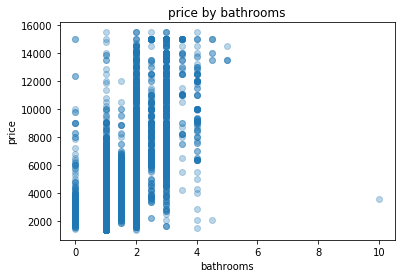

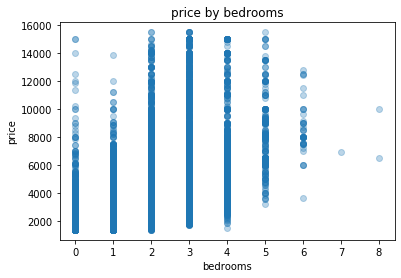

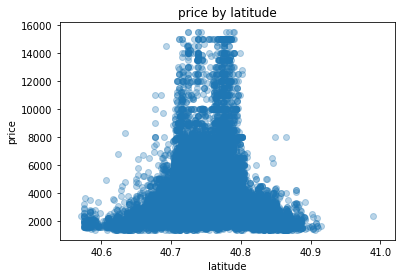

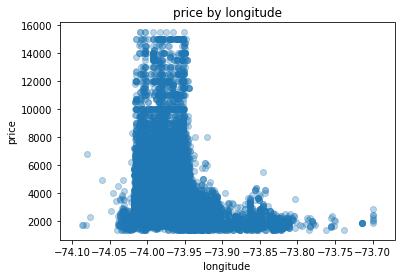

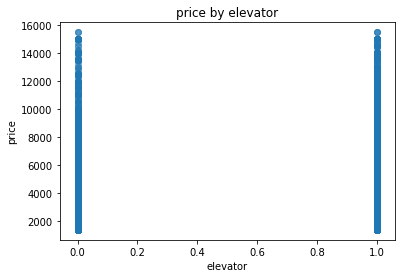

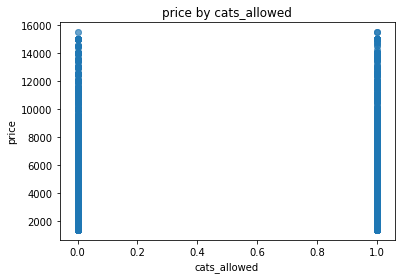

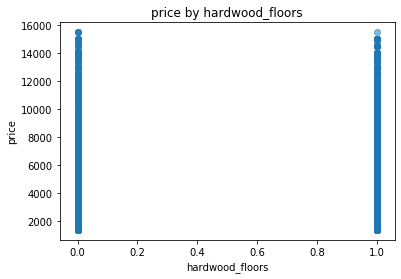

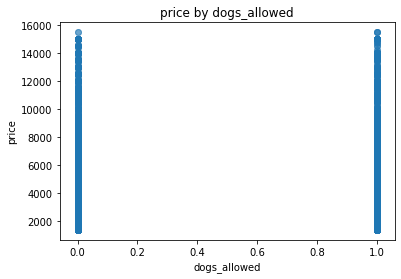

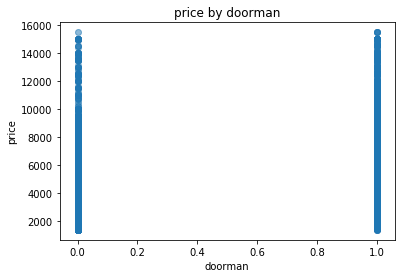

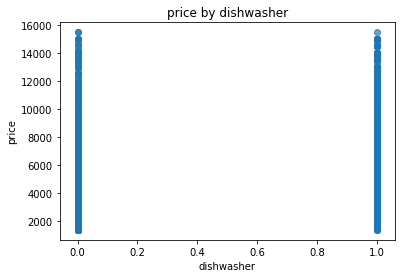

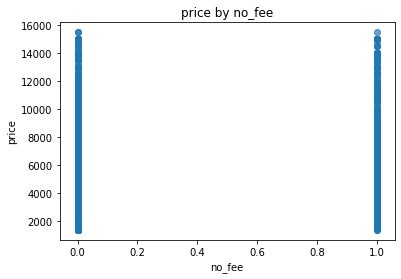

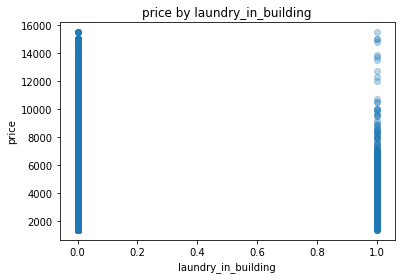

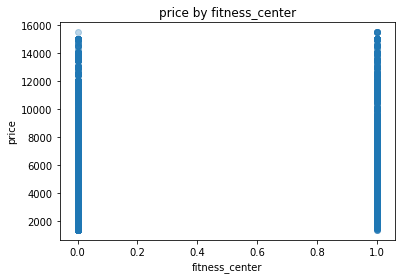

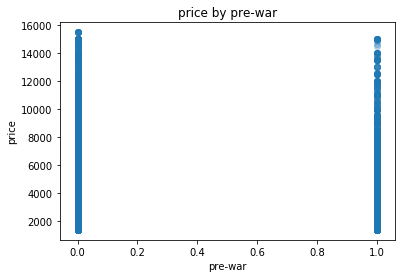

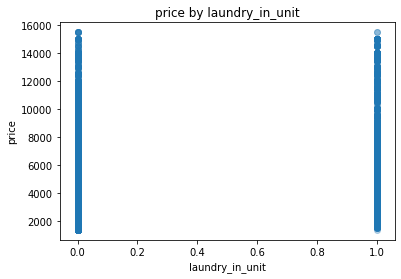

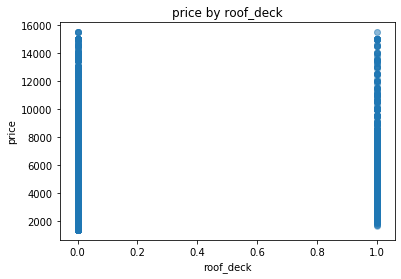

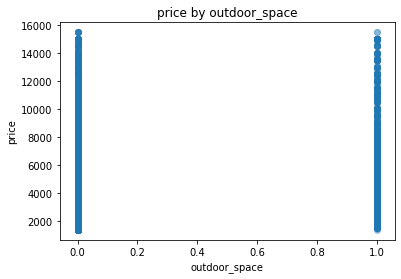

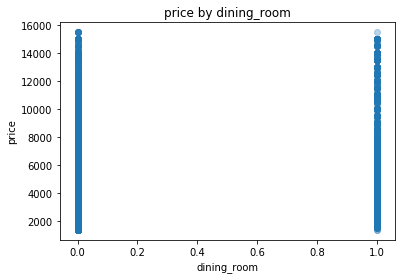

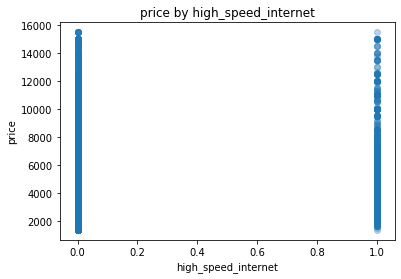

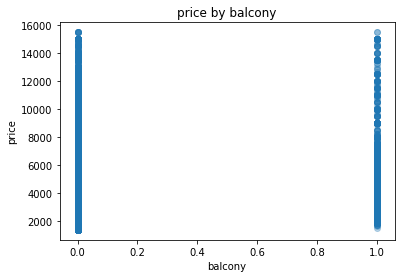

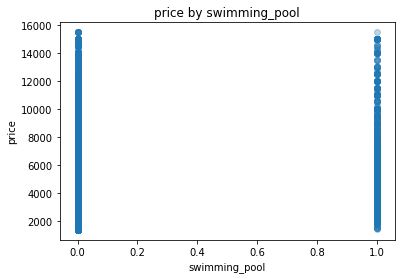

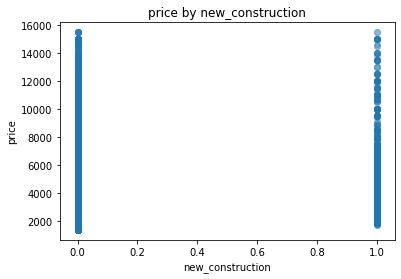

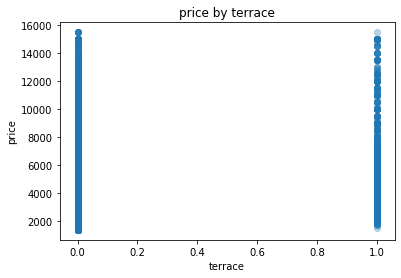

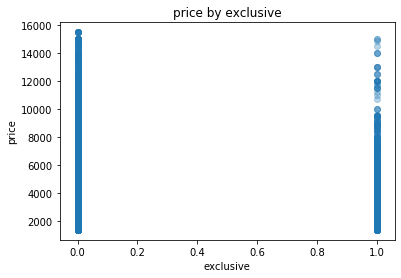

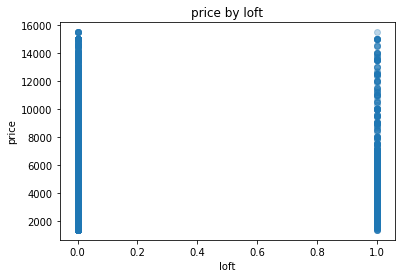

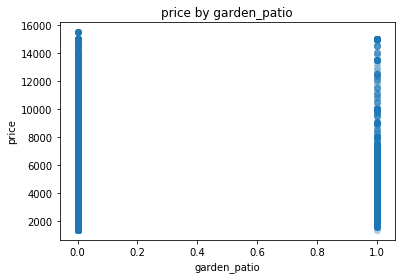

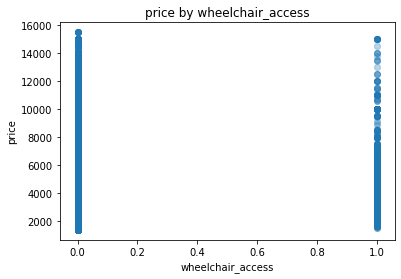

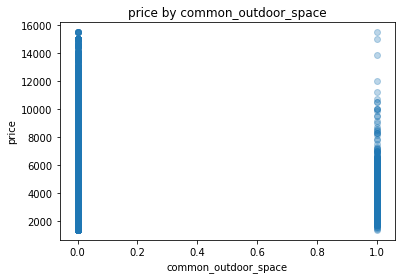

In [15]:
for feature in df.select_dtypes(include='number').columns:
  if feature == target:
    continue
  plt.scatter(df[feature], df[target], alpha=0.3)
  plt.xlabel(feature)
  plt.ylabel(target)
  plt.title(f'{target} by {feature}')
  plt.show()

'latitude' seems like it would offer the best prediction if using a single feature

## begin with a baseline

using the mean as a baseline prediction

In [16]:
y_true = df[target]
y_pred = [y_true.mean()] * len(y_true)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)

print(f'Baseline MAE: {mae:.2f} dollars')

Baseline MAE: 1201.53 dollars


## Use scikit-learn for linear regression with one feature. You can follow the 5-step process from Jake VanderPlas.


1. Import the appropriate estimator class from Scikit-Learn

In [0]:
from sklearn.linear_model import LinearRegression

2. Instantiate this class

In [0]:
model = LinearRegression(n_jobs=-1)

3. Arrange X features matrix & y target vector

In [0]:
target = 'price'
features = ['latitude']

X_ = df[features]
y_true = df[target]

4. Fit the model

In [21]:
model.fit(X_, y_true)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

5. Apply the model to new data

In [23]:
new_data = [[40.7283]]

model.predict(new_data)

array([3616.34780058])

##  Define a function to make new predictions and explain the model coefficient.

In [0]:
def predict(dataframe, target:str, feature:str, value):
  assert feature in dataframe.columns, f'feature {feature} not in dataframe'
  assert target in dataframe.columns, f'target {target} not in dataframe'

  y_true = dataframe[target]
  X = dataframe[[feature]]

  model = LinearRegression(n_jobs=-1)
  model.fit(X, y_true)
  prediction = model.predict([[value]])[0]
  coefficient = model.coef_[0]

  return f'{prediction} predicted {target} for {feature}={value}.\nIn this linear regression, each additional unit of {feature} adds {coefficient} to the {target}.'

In [48]:
print(predict(df, 'price', 'bedrooms', 5))

6534.244986815204 predicted price for bedrooms=5.
In this linear regression, each additional unit of bedrooms adds 853.2541675274308 to the price.


In [49]:
print(predict(df, 'price', 'bathrooms', 3.5))

9493.714918310896 predicted price for bathrooms=3.5.
In this linear regression, each additional unit of bathrooms adds 2573.3743950844187 to the price.


In [50]:
print(predict(df, 'bathrooms', 'latitude', 40.7539))

1.2023009344888012 predicted bathrooms for latitude=40.7539.
In this linear regression, each additional unit of latitude adds 0.16243037318682954 to the bathrooms.


## Do linear regression with two or more features

In [51]:
target = 'price'
features = ['latitude', 'longitude', 'bedrooms', 'bathrooms']

X = df[features]
y_true = df[target]

model = LinearRegression(n_jobs=-1)

model.fit(X, y_true)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [54]:
model.predict([[40.7539, -73.9677, 1, 1.0]])[0]

2865.5195311394054

In [59]:
model.predict([df.loc[2542, features]])[0]

3355.9757162360474

In [60]:
df.loc[2542, 'price']

3330